## Dimensionality reduction, Principal Component Analysis

### A more intuitive example

In [1]:
import pandas as pd
import numpy as np
from PIL import Image, ImageFilter, ImageOps
import matplotlib.pyplot as plt

## Hardcoded input args
imgList='./Lists/ListImages.csv'
inDir='./Data/faces94'


In [2]:
## Read list of images
df = pd.read_csv(imgList)
df.shape

(3059, 4)

In [3]:
## Read images as numpy array
tmpRGB = np.asarray(Image.open(inDir + '/' + df.IMGPATH[0]))
imgSize = np.array(tmpRGB.shape)
imgSize = imgSize[[2,0,1]]                  

#dMat = np.zeros([df.shape[0], imgSize[0], np.prod(imgSize[1:])]).astype(np.uint8)
dMat = np.zeros([50, imgSize[0], np.prod(imgSize[1:])]).astype(np.uint8)

## Read images to data matrix
print('Reading images ...')
for i, tmpRow in df.head(50).iterrows():
    tmpRGB = np.asarray(Image.open(inDir + '/' + tmpRow.IMGPATH))
    tmpRGB = np.moveaxis(tmpRGB,2,0)
    tmpRGB = tmpRGB.reshape([tmpRGB.shape[0], tmpRGB.shape[1]*tmpRGB.shape[2]])
    
    dMat[i,:, :] = tmpRGB
    

Reading images ...


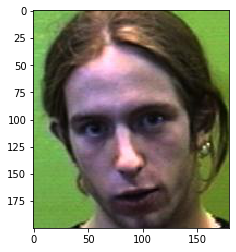

In [4]:
## Check few images
imTmp = dMat[35,:,:].reshape(imgSize)
imTmp = np.moveaxis(imTmp,0,2)
plt.imshow(imTmp)
plt.show()


In [5]:
## Read images as numpy array (as grayscale)
tmpRGB = np.asarray(Image.open(inDir + '/' + df.IMGPATH[0]))
imgSize = np.array(tmpRGB.shape[0:2])

dMat = np.zeros([df.shape[0], np.prod(imgSize)]).astype(np.uint8)

## Read images to data matrix
print('Reading images ...')
for i, tmpRow in df.iterrows():
    tmpRGB = Image.open(inDir + '/' + tmpRow.IMGPATH)
    tmpGray = np.asarray(ImageOps.grayscale(tmpRGB)).astype(np.uint8).flatten()

    dMat[i,:] = tmpGray

Reading images ...


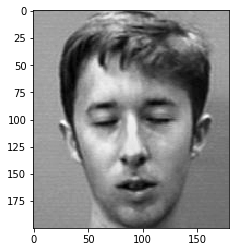

In [6]:
## Check few images
plt.imshow(dMat[217,:].reshape(imgSize).squeeze(), cmap='gray')
plt.show()

In [9]:
## Apply PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

NUM_COMP = 80

scaler = StandardScaler()
scaler.fit(dMat)
X = scaler.transform(dMat)

pca = PCA(n_components = NUM_COMP)
pcaMdl = pca.fit(X)
pcaCoor = pcaMdl.transform(X)
dfPCA = pd.DataFrame(data = pcaCoor, columns = ['PCA_' + s for s in np.arange(0, NUM_COMP).astype(str)])


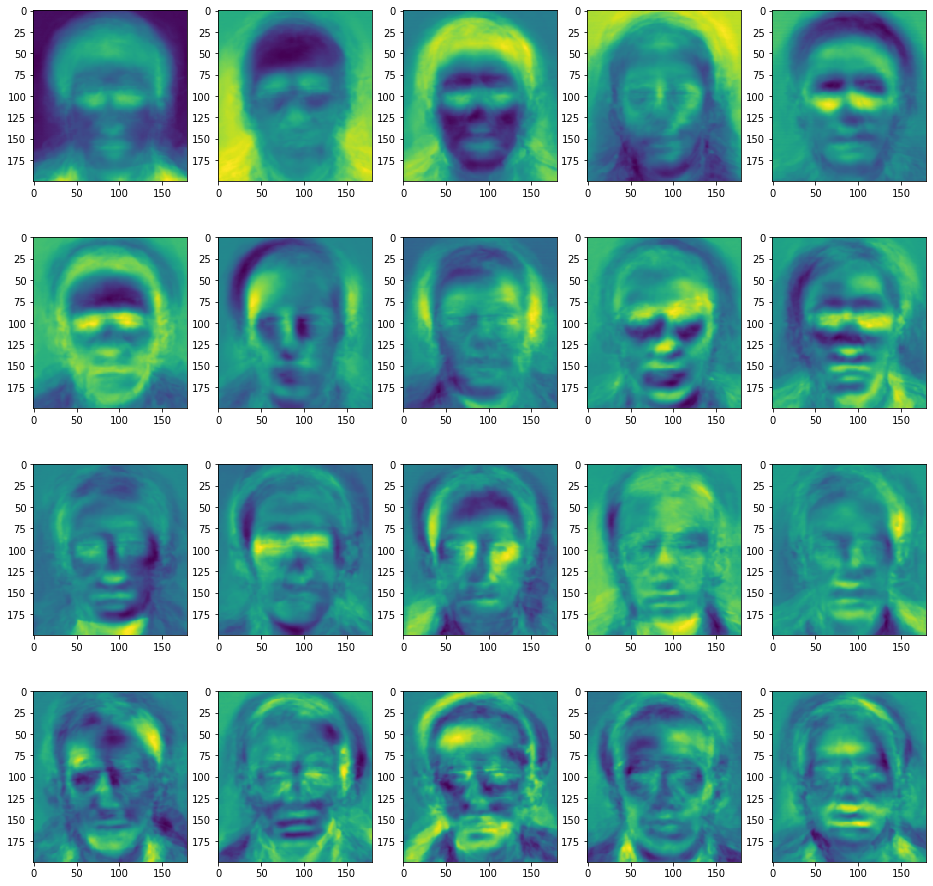

In [10]:
## Display eigenvectors
fig, axs = plt.subplots(4, 5, figsize = [ 16, 16])
for i in np.arange(0,4):
    for j in np.arange(0,5):
        ind = i*5+j
        pImg = np.array(pcaMdl.components_[ind,:]).reshape(imgSize)
        axs[i,j].imshow(pImg)
plt.show()


In [11]:
print(pcaMdl.explained_variance_ratio_)
print(np.sum(pcaMdl.explained_variance_ratio_))

[0.31898706 0.08692397 0.05576781 0.04448508 0.03502949 0.02865852
 0.02607636 0.01995212 0.01740525 0.01510631 0.01362665 0.01255081
 0.01153817 0.01045707 0.00953286 0.00886405 0.00836333 0.00747413
 0.00711842 0.00656837 0.00635128 0.00612415 0.00586056 0.0056056
 0.00516917 0.00510725 0.00488236 0.0047051  0.00440142 0.00424744
 0.00416108 0.00395889 0.0037104  0.003551   0.00349723 0.00334027
 0.00325152 0.00320825 0.00309249 0.00300448 0.00287485 0.00275472
 0.00266512 0.00256148 0.00250674 0.00248115 0.0023822  0.00232691
 0.00229144 0.00217328 0.00212603 0.00203242 0.00197236 0.00192557
 0.00189922 0.00182939 0.00180189 0.00174906 0.00172597 0.00169419
 0.00166823 0.00161749 0.0015574  0.00151926 0.00145938 0.00142796
 0.00141418 0.00138003 0.00137014 0.00132028 0.00128626 0.0012539
 0.00120922 0.00120007 0.00114917 0.00113998 0.00110152 0.00109658
 0.00107823 0.00105184]
0.9017909075439635


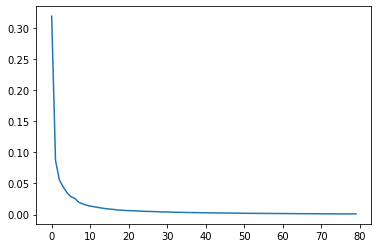

In [12]:
plt.plot(pcaMdl.explained_variance_ratio_)

### Reconstruction error using PCA

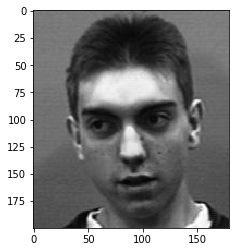

In [13]:
IMG_NO = 77

f1 = dMat[IMG_NO,:].reshape(imgSize)
plt.imshow(f1, cmap='gray')

7

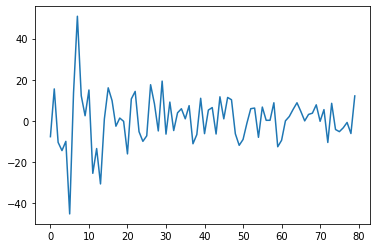

In [16]:
plt.plot(pcaCoor[IMG_NO,0:NUM_COMP])

#### A different subject

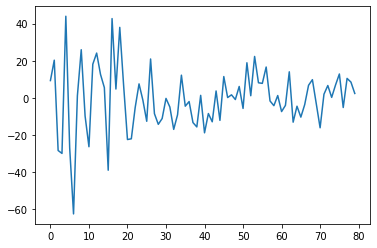

In [17]:
plt.plot(pcaCoor[0,0:NUM_COMP])

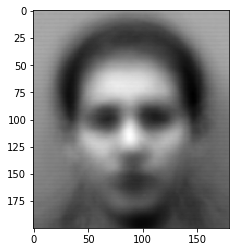

In [26]:
NUM_COMP = 1
imgRecon = np.dot(pcaCoor[IMG_NO, 0:NUM_COMP], pcaMdl.components_[0:NUM_COMP,:])
imgRecon = scaler.inverse_transform(imgRecon)
f1 = imgRecon.reshape(imgSize)
plt.imshow(f1, cmap='gray')

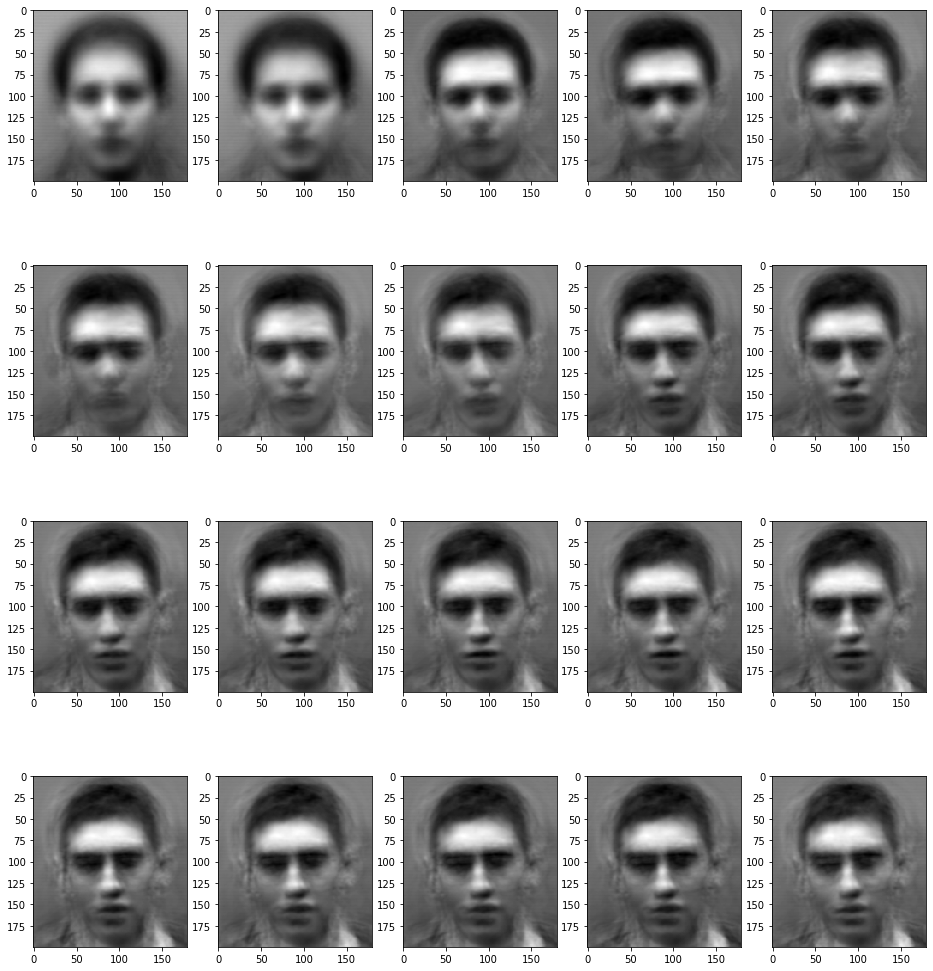

In [28]:
fig, axs = plt.subplots(4, 5, figsize = [ 16, 18])
for i in np.arange(0,4):
    for j in np.arange(0,5):
        ind = (i*5+j)*4
        
        imgRecon = np.dot(pcaCoor[IMG_NO,0:ind], pcaMdl.components_[0:ind,:])
        imgRecon = scaler.inverse_transform(imgRecon)
        f1 = imgRecon.reshape(imgSize)
        axs[i,j].imshow(f1, cmap='gray')
plt.show()


### Difference image

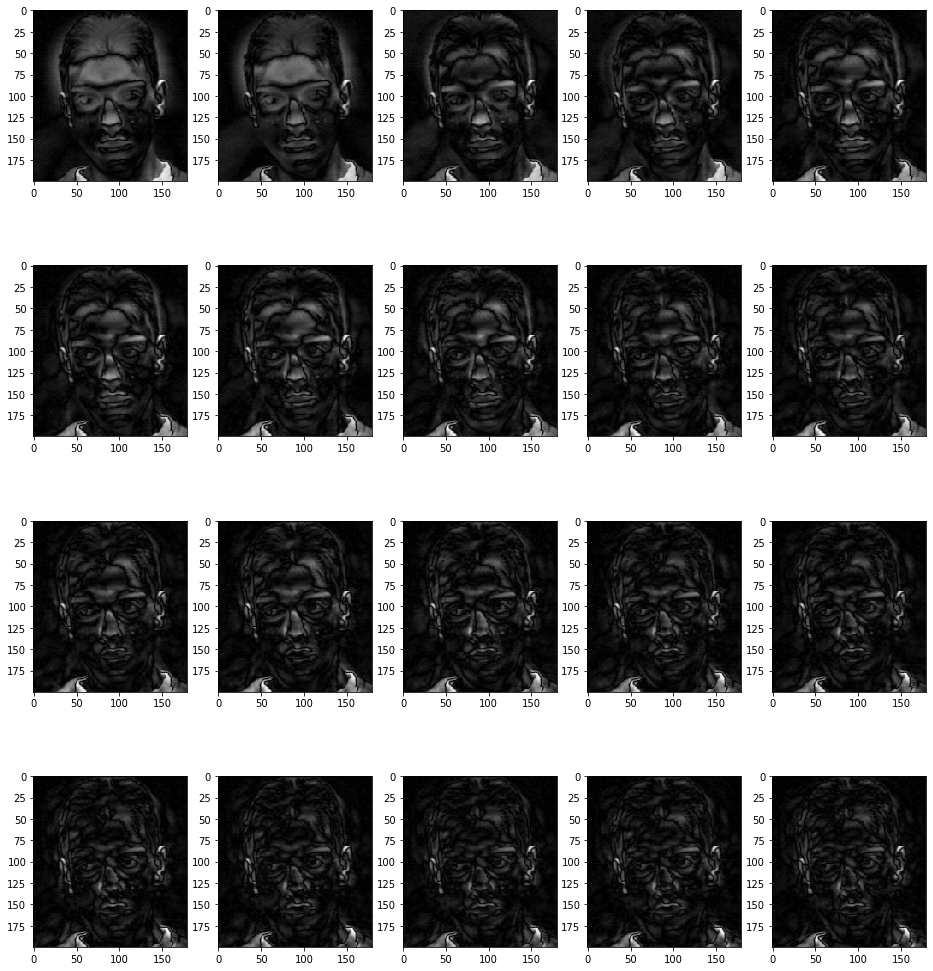

In [29]:
fig, axs = plt.subplots(4, 5, figsize = [ 16, 18])

imgActual = dMat[IMG_NO,:]

for i in np.arange(0,4):
    for j in np.arange(0,5):
        ind = (i*5+j)*4
        
        imgRecon = np.dot(pcaCoor[IMG_NO,0:ind], pcaMdl.components_[0:ind,:])
        imgRecon = scaler.inverse_transform(imgRecon)
        
        imgDiff = np.abs(imgActual - imgRecon)
        
        f1 = imgDiff.reshape(imgSize)
        
        axs[i,j].imshow(f1, cmap='gray')
plt.show()


In [33]:
from numpy import linalg as LA

imgActual = dMat[IMG_NO, :]

for i in np.arange(0,4):
    for j in np.arange(0,5):
        ind = (i*5+j)*4
        
        imgRecon = np.dot(pcaCoor[IMG_NO, 0:ind], pcaMdl.components_[0:ind,:])
        imgRecon = scaler.inverse_transform(imgRecon)
        
        imgDiff = np.abs(imgActual - imgRecon)

        print('Num PCA comp: ' + str(ind) + ', reconstruction error: ' + str(LA.norm(imgDiff.flatten())))
        


Num PCA comp: 0, reconstruction error: 7031.039849024499
Num PCA comp: 4, reconstruction error: 6776.384720212877
Num PCA comp: 8, reconstruction error: 5337.401341430415
Num PCA comp: 12, reconstruction error: 5071.83556470927
Num PCA comp: 16, reconstruction error: 4816.157354198696
Num PCA comp: 20, reconstruction error: 4795.444216709819
Num PCA comp: 24, reconstruction error: 4641.532353431051
Num PCA comp: 28, reconstruction error: 4436.78900161255
Num PCA comp: 32, reconstruction error: 4273.6934034647875
Num PCA comp: 36, reconstruction error: 4251.953996549862
Num PCA comp: 40, reconstruction error: 4183.14537201058
Num PCA comp: 44, reconstruction error: 4148.764002774247
Num PCA comp: 48, reconstruction error: 3940.2614509496752
Num PCA comp: 52, reconstruction error: 3822.177076172974
Num PCA comp: 56, reconstruction error: 3745.6543765564415
Num PCA comp: 60, reconstruction error: 3637.2987813051413
Num PCA comp: 64, reconstruction error: 3577.4659975825016
Num PCA comp: 6